In [2]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
physical=tf.config.experimental.list_physical_devices('GPU')
print('device are ',len(physical))

device are  0


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler  

Matplotlib is building the font cache; this may take a moment.


In [5]:
from random import randint

In [6]:
train_sample=[]
train_lables=[]

In [7]:
for i in range(50):
    # 5% affected population between 13 to 65
    ran=randint(13,65)
    train_sample.append(ran)
    train_lables.append(1)
    # 5% did not  affected population between 65 to 100
    ran=randint(65,100)
    train_sample.append(ran)
    train_lables.append(0)

for i in range(1000):
    # 95%  did not affected population between 13 to 65
    ran=randint(13,65)
    train_sample.append(ran)
    train_lables.append(0)
    # 95% affected population between 65 to 100
    ran=randint(65,100)
    train_sample.append(ran)
    train_lables.append(1)

In [8]:
train_sample=np.array(train_sample)
train_lables=np.array(train_lables)

In [9]:
train_lables,train_sample=shuffle(train_lables,train_sample)

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_sample=scaler.fit_transform(train_sample.reshape(-1,1))

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.metrics import categorical_crossentropy

In [12]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

here vslidation set is being split from the traing set and
** we must remember that out model is not traing on the validation srt it is just to see how god the model is learning from traing sets
epoch ===mean it will lern or take the same to learn for ex if we have 4000 rows of data it will fit on that set on n number of tome 
batch_size ==== it mean how much aqmpunt of thedata our model take at a time from the data sxet that is 4000

In [15]:
model.fit(x=scaled_sample,y=train_lables,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.5139 - accuracy: 0.7762 - val_loss: 0.3232 - val_accuracy: 0.9381
Epoch 2/30
189/189 - 0s - loss: 0.3213 - accuracy: 0.9095 - val_loss: 0.2167 - val_accuracy: 0.9429
Epoch 3/30
189/189 - 0s - loss: 0.2865 - accuracy: 0.9180 - val_loss: 0.1895 - val_accuracy: 0.9714
Epoch 4/30
189/189 - 0s - loss: 0.2770 - accuracy: 0.9254 - val_loss: 0.1762 - val_accuracy: 0.9619
Epoch 5/30
189/189 - 0s - loss: 0.2710 - accuracy: 0.9243 - val_loss: 0.1743 - val_accuracy: 0.9714
Epoch 6/30
189/189 - 0s - loss: 0.2683 - accuracy: 0.9275 - val_loss: 0.1629 - val_accuracy: 0.9810
Epoch 7/30
189/189 - 0s - loss: 0.2658 - accuracy: 0.9328 - val_loss: 0.1650 - val_accuracy: 0.9571
Epoch 8/30
189/189 - 0s - loss: 0.2693 - accuracy: 0.9275 - val_loss: 0.1596 - val_accuracy: 0.9714
Epoch 9/30
189/189 - 0s - loss: 0.2638 - accuracy: 0.9376 - val_loss: 0.1577 - val_accuracy: 0.9714
Epoch 10/30
189/189 - 0s - loss: 0.2629 - accuracy: 0.9339 - val_loss: 0.1563 - val_accuracy: 0.9810

In [ ]:
for i in range(50):
    # 5% affected population between 13 to 65
    ran=randint(13,65)
    test_sample.append(ran)
    test_lables.append(1)
    # 5% did not  affected population between 65 to 100
    ran=randint(65,100)
    test_sample.append(ran)
    test_lables.append(0)

for i in range(1000):
    # 95%  did not affected population between 13 to 65
    ran=randint(13,65)
    test_sample.append(ran)
    test_lables.append(0)
    # 95% affected population between 65 to 100
    ran=randint(65,100)
    test_sample.append(ran)
    test_lables.append(1)

In [17]:
test_sample=np.array(train_sample)
test_lables=np.array(train_lables)
test_lables,test_sample=shuffle(train_lables,train_sample)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_sample=scaler.fit_transform(train_sample.reshape(-1,1))

In [18]:
pred=model.predict(x=scaled_sample ,batch_size=10 , verbose=0)

In [26]:
pred

array([[0.0577175 , 0.9422825 ],
       [0.5672529 , 0.43274713],
       [0.02155326, 0.97844666],
       ...,
       [0.9455838 , 0.05441617],
       [0.938742  , 0.06125801],
       [0.9429911 , 0.05700896]], dtype=float32)

In [40]:
rounded=np.argmax(pred,axis=1)
rounded

array([1, 0, 1, ..., 0, 0, 0])

In [31]:
import matplotlib

In [34]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt 
import itertools

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[509 541]
 [524 526]]


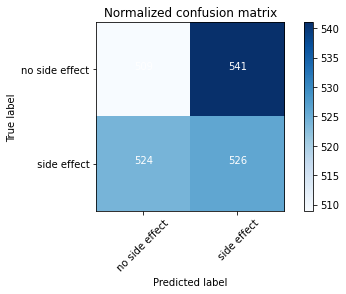

In [42]:
plt.figure()
cm=metrics.confusion_matrix(y_true=test_lables,y_pred=rounded)
class_names=['no side effect',' side effect']
plot_confusion_matrix(cm, classes=class_names, 
                      title='Normalized confusion matrix')